In [2]:
import pandas as pd 

In [3]:
npr = pd.read_csv('data.csv')

In [4]:
npr.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [10]:
dtm = tfidf.fit_transform(npr['summary'])

In [11]:
from sklearn.decomposition import NMF

In [12]:
nmf_model = NMF(n_components=5,random_state=42)

In [13]:
nmf_model.fit(dtm)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=5, random_state=42)

In [15]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['future', 'york', 'science', 'war', 'earth', 'people', 'story', 'time', 'novel', 'history', 'life', 'human', 'new', 'book', 'world']


THE TOP 15 WORDS FOR TOPIC #1
['night', 'young', 'girl', 'town', 'woman', 'killer', 'old', 'life', 'father', 'police', 'mother', 'house', 'man', 'murder', 'family']


THE TOP 15 WORDS FOR TOPIC #2
['prince', 'queen', 'island', 'lord', 'british', 'captain', 'arthur', 'french', 'battle', 'army', 'crew', 'war', 'jack', 'king', 'ship']


THE TOP 15 WORDS FOR TOPIC #3
['case', 'tiger', 'fbi', 'killer', 'mi6', 'washington', 'soneji', 'sampson', 'cia', 'scorpia', 'milo', 'robin', 'kyle', 'cross', 'alex']


THE TOP 15 WORDS FOR TOPIC #4
['belle', 'harlequin', 'morte', 'power', 'buffy', 'master', 'jason', 'micah', 'edward', 'vampires', 'vampire', 'richard', 'jean', 'claude', 'anita']




In [16]:
topic_results = nmf_model.transform(dtm)

In [17]:
npr['Topic'] = topic_results.argmax(axis=1)

In [18]:
npr.head(10)

,index,title,genre,summary,Topic
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,2
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",2
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,2
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,2
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,2
5,5,Thendara House,fantasy,The novel concerns the dwelling of the Darkov...,0
6,6,The Thief,fantasy,"Gen is released from prison by the magus, the...",2
7,7,The Sweet Far Thing,fantasy,The prologue begins with two men who are sear...,2
8,8,Mistborn: The Final Empire,fantasy,"In Luthadel, the capital city of the Final Em...",2
9,9,The Sorcerer's Ship,fantasy,A man named Gene finds himself cast into a ne...,2


In [20]:
#check for errors

In [32]:
len(tfidf.get_feature_names_out())

27949

In [33]:
fantasy=[]
horror=[]
history=[]
thriller =[] 
science = []

for i in range(4656):
    if npr['genre'][i] == 'fantasy':
        fantasy.append(npr['Topic'][i]) 
    elif npr['genre'][i] == 'horror':
        horror.append(npr['Topic'][i])
    elif npr['genre'][i] == 'history':
        history.append(npr['Topic'][i])
    elif npr['genre'][i] == 'thriller':
        thriller.append(npr['Topic'][i])
    elif npr['genre'][i] == 'science':
        science.append(npr['Topic'][i])


(array([350.,   0.,   0.,  54.,   0.,   0., 240.,   0.,   0.,   3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

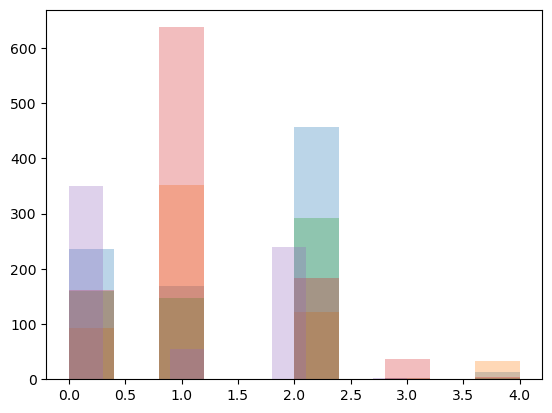

In [49]:
import matplotlib.pyplot as plt
data = [0,1,2,3,4]
plt.hist(fantasy, alpha = 0.3)
plt.hist(horror, alpha = 0.3)
plt.hist(history, alpha = 0.3)
plt.hist(thriller, alpha = 0.3)
plt.hist(science, alpha = 0.3)


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(npr['summary'])
dtm

<4657x27949 sparse matrix of type '<class 'numpy.int64'>'
	with 579416 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.decomposition import LatentDirichletAllocation

In [53]:
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [54]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['killed', 'old', 'jamie', 'battle', 'later', 'tells', 'house', 'father', 'david', 'army', 'man', 'richard', 'time', 'arthur', 'king']


THE TOP 15 WORDS FOR TOPIC #1
['way', 'man', 'power', 'years', 'earth', 'human', 'people', 'war', 'book', 'novel', 'story', 'new', 'life', 'time', 'world']


THE TOP 15 WORDS FOR TOPIC #2
['family', 'way', 'takes', 'french', 'life', 'home', 'old', 'finds', 'father', 'new', 'later', 'man', 'jack', 'time', 'ship']


THE TOP 15 WORDS FOR TOPIC #3
['group', 'kill', 'power', 'president', 'way', 'human', 'american', 'people', 'war', 'life', 'time', 'book', 'world', 'anita', 'new']


THE TOP 15 WORDS FOR TOPIC #4
['years', 'murder', 'death', 'tells', 'day', 'old', 'home', 'night', 'new', 'mother', 'family', 'life', 'man', 'house', 'father']




In [55]:
topic_results = LDA.transform(dtm)
npr['topic_lda'] = topic_results.argmax(axis=1)

In [56]:
npr.head(10)

,index,title,genre,summary,Topic,topic_lda
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,2,0
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",2,2
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,2,1
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,2,3
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,2,0
5,5,Thendara House,fantasy,The novel concerns the dwelling of the Darkov...,0,1
6,6,The Thief,fantasy,"Gen is released from prison by the magus, the...",2,2
7,7,The Sweet Far Thing,fantasy,The prologue begins with two men who are sear...,2,1
8,8,Mistborn: The Final Empire,fantasy,"In Luthadel, the capital city of the Final Em...",2,3
9,9,The Sorcerer's Ship,fantasy,A man named Gene finds himself cast into a ne...,2,1


In [62]:
f=[]
h=[]
hi=[]
thr =[] 
sci = []

for i in range(4656):
    if npr['genre'][i] == 'fantasy':
        f.append(npr['topic_lda'][i]) 
    elif npr['genre'][i] == 'horror':
        h.append(npr['topic_lda'][i])
    elif npr['genre'][i] == 'history':
        hi.append(npr['topic_lda'][i])
    elif npr['genre'][i] == 'thriller':
        thr.append(npr['topic_lda'][i])
    elif npr['genre'][i] == 'science':
        sci.append(npr['topic_lda'][i])

(array([100.,   0., 449.,   0.,   0.,  87.,   0.,  57.,   0., 182.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

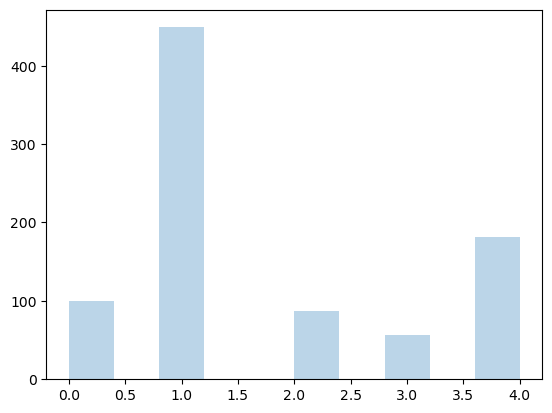

In [61]:
import matplotlib.pyplot as plt
data = [0,1,2,3,4]
plt.hist(f, alpha = 0.3)
#plt.hist(h, alpha = 0.3)
#plt.hist(hi, alpha = 0.3)
#plt.hist(thr, alpha = 0.3)
#plt.hist(sci, alpha = 0.3)
